# US Accidents Exploratory Data Analysis Project



The dataset used in this project contains records of Car accidents in the 49 states of USA between the period February 2016 to December 2021. The data has been collected using multiple APIs that provide streaming traffic incident (or event) data. Currently, there are about 2.8 million records in this dataset.



Whiile the dataset contains huge wealth of information, this project is mainly focused on 3 aspects of these accidents.
1. Per City Analysis
2. Daily , Monthly and Yearly trends
3. Severity

Let's begin by installing the jovian module to save our work to jovia.ai.

In [ ]:
!pip install jovian --upgrade --quiet

In [ ]:
import jovian

In [ ]:
# Execute this to save new versions of the notebook
jovian.commit(project="us-accidents-eda-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/palak780nain/us-accidents-eda-project


'https://jovian.ai/palak780nain/us-accidents-eda-project'

## Downloading the Dataset

I have used the `opendatasets` module to download the dataset from kaggle website.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od

In [ ]:
download_url = 'https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents'
od.download(download_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: priyapalak
Your Kaggle Key: ··········


100%|██████████| 269M/269M [00:01<00:00, 175MB/s]


It's always good to save your file path to a variable, that can be used later.

In [ ]:
data_filename = './us-accidents/US_Accidents_Dec21_updated.csv'

## Data Preparation and Cleaning

Now that we have downloaded the dataset, the next step is to load it as a pandas dataframe so that we can analyse the tabular data.

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv(data_filename)

In [ ]:
df

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,A-2845338,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.998880,-117.370940,0.543,At Market St - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845338,A-2845339,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.765550,-117.153630,0.338,At Camino Del Rio/Mission Center Rd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day
2845339,A-2845340,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.777400,-117.857270,0.561,At Glassell St/Grand Ave - Accident. in the ri...,...,False,False,False,False,False,False,Day,Day,Day,Day
2845340,A-2845341,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.983110,-118.395650,0.772,At CA-90/Marina Fwy/Jefferson Blvd - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


Here we can see that the dataset has around 2.8 Million records and 47 columns. We can only see the first and last five records because that's the default setting in Python.

The next step is Data Preparation and Cleaning. This step involves checking the readiness of data for use. We'll look into these columns, find out if any data quality issues are present and try to eliminate them.

Let's look at some more details regarding the columns contained in the dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

Let's see how many numeric columns do we have.

In [ ]:
df.select_dtypes(include= 'number')

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
0,3,40.108910,-83.092860,40.112060,-83.031870,3.230,NaN,42.1,36.1,58.0,29.76,10.0,10.4,0.00
1,2,39.865420,-84.062800,39.865010,-84.048730,0.747,NaN,36.9,NaN,91.0,29.68,10.0,NaN,0.02
2,2,39.102660,-84.524680,39.102090,-84.523960,0.055,NaN,36.0,NaN,97.0,29.70,10.0,NaN,0.02
3,2,41.062130,-81.537840,41.062170,-81.535470,0.123,NaN,39.0,NaN,55.0,29.65,10.0,NaN,NaN
4,3,39.172393,-84.492792,39.170476,-84.501798,0.500,NaN,37.0,29.8,93.0,29.69,10.0,10.4,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845337,2,34.002480,-117.379360,33.998880,-117.370940,0.543,NaN,86.0,86.0,40.0,28.92,10.0,13.0,0.00
2845338,2,32.766960,-117.148060,32.765550,-117.153630,0.338,NaN,70.0,70.0,73.0,29.39,10.0,6.0,0.00
2845339,2,33.775450,-117.847790,33.777400,-117.857270,0.561,NaN,73.0,73.0,64.0,29.74,10.0,10.0,0.00
2845340,2,33.992460,-118.403020,33.983110,-118.395650,0.772,NaN,71.0,71.0,81.0,29.62,10.0,8.0,0.00


So, we have 14 numerical columns out of the total 47 columns in our dataset.

Let's find out if we have any null values in the dataset.

In [ ]:
df.isnull().sum().sum()

3414349

This was the total number of null values in the whole dataset. Let's look at it column-wise.

In [ ]:
df.isnull().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

Percentage of null values per column

In [ ]:
null_percentages = df.isnull().sum().sort_values(ascending = False)*100/len(df)
null_percentages

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
Country                   0.000000
Junction                  0.000000
Start_Time                0.000000
End_Time                  0.000000
Start_Lat                 0.000000
Turning_Loop              0.000000
Traffic_Signal            0.000000
Traffic_Calming           0.000000
Stop                

In [ ]:
null_percentages[null_percentages != 0]

Number                   61.290031
Precipitation(in)        19.310789
Wind_Chill(F)            16.505678
Wind_Speed(mph)           5.550967
Wind_Direction            2.592834
Humidity(%)               2.568830
Weather_Condition         2.482514
Visibility(mi)            2.479350
Temperature(F)            2.434646
Pressure(in)              2.080593
Weather_Timestamp         1.783125
Airport_Code              0.335601
Timezone                  0.128596
Nautical_Twilight         0.100761
Civil_Twilight            0.100761
Sunrise_Sunset            0.100761
Astronomical_Twilight     0.100761
Zipcode                   0.046356
City                      0.004815
Street                    0.000070
dtype: float64

Next, I have plotted a bar graph to visually depict the null values percentage of the columns.

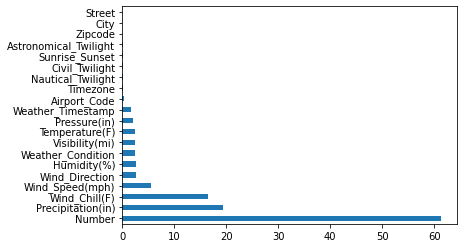

In [ ]:
null_percentages[null_percentages != 0].plot(kind = 'barh');

As we can see in the graph above, the column `Number` has more than 60% of data missing, followed by `Precipitation` and `Wind Chill` which have 18-20% of data missing. `Wind Speed` has around 6% of the data missing and the rest of the columns have less than 5% of the data missing.

## Exploratory Analysis and Visualizations

Now, after Data Preparation and Cleaning, we move to the Exploratory Analysis of our dataset.

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns, to spot anomalies, to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

It is a good practice to understand the data first and try to gather as many insights from it. EDA is all about making sense of data in hand, before getting them dirty with it.



Let's import the libraries required for creating visualisations.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Okay, so now let's pick a subset of columns from this dataset that we'll be working on.

In [ ]:
selected_columns = [ 'Severity', 'Start_Time',
                    'Start_Lat','Start_Lng',
                    'City', 'State',
                    'Temperature(F)' 
                   ]


Now, let's create a dataframe `new_df` that contains only these selected columns.

In [ ]:
new_df = df[selected_columns]
new_df

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
0,3,2016-02-08 00:37:08,40.108910,-83.092860,Dublin,OH,42.1
1,2,2016-02-08 05:56:20,39.865420,-84.062800,Dayton,OH,36.9
2,2,2016-02-08 06:15:39,39.102660,-84.524680,Cincinnati,OH,36.0
3,2,2016-02-08 06:51:45,41.062130,-81.537840,Akron,OH,39.0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,Cincinnati,OH,37.0
...,...,...,...,...,...,...,...
2845337,2,2019-08-23 18:03:25,34.002480,-117.379360,Riverside,CA,86.0
2845338,2,2019-08-23 19:11:30,32.766960,-117.148060,San Diego,CA,70.0
2845339,2,2019-08-23 19:00:21,33.775450,-117.847790,Orange,CA,73.0
2845340,2,2019-08-23 19:00:21,33.992460,-118.403020,Culver City,CA,71.0


In [ ]:
len(selected_columns)

7

So, I have selected 7 out of 47 columns to perform the analysis on this dataset. 

Let's begin our EDA with the column `City`.

### City

In [ ]:
new_df.City.nunique()

11681

So, it looks like we have accidents data from over 11,000 cities of USA. Let's check how many states are covered here.

In [ ]:
new_df.State.nunique()

49

There are 50 states in USA and we have data from 49 of them, which is pretty impressive. I wonder which one state is left out here.

In [ ]:
new_df.State.unique()

array(['OH', 'IN', 'KY', 'WV', 'MI', 'PA', 'CA', 'NV', 'MN', 'TX', 'MO',
       'CO', 'OK', 'LA', 'KS', 'WI', 'IA', 'MS', 'NE', 'ND', 'WY', 'SD',
       'MT', 'NM', 'AR', 'IL', 'NJ', 'GA', 'FL', 'NY', 'CT', 'RI', 'SC',
       'NC', 'MD', 'MA', 'TN', 'VA', 'DE', 'DC', 'ME', 'AL', 'NH', 'VT',
       'AZ', 'UT', 'ID', 'OR', 'WA'], dtype=object)

In [ ]:
cities_by_accidents = new_df.City.value_counts()
cities_by_accidents

Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64

Let's look at the top 20 cities with maximum number of accidents.

In [ ]:
cities_by_accidents.head(20)

Miami           106966
Los Angeles      68956
Orlando          54691
Dallas           41979
Houston          39448
Charlotte        33152
Sacramento       32559
San Diego        26627
Raleigh          22840
Minneapolis      22768
Portland         20944
Nashville        20267
Austin           18301
Baton Rouge      18182
Phoenix          17143
Saint Paul       16869
New Orleans      16251
Atlanta          15622
Jacksonville     14967
Richmond         14349
Name: City, dtype: int64

In [ ]:
new_df[new_df.City == 'New York' ]

,Severity,Start_Time,Start_Lat,Start_Lng,City,State,Temperature(F)
31580,2,2016-11-30 15:58:59,40.850020,-73.943990,New York,NY,53.1
31625,2,2016-11-30 17:31:55,40.771460,-73.946580,New York,NY,53.1
31710,3,2016-11-26 22:57:16,40.762979,-73.973938,New York,NY,41.0
31901,3,2016-12-01 12:14:13,40.744340,-73.971240,New York,NY,53.1
32073,2,2016-12-01 18:54:49,40.710680,-74.002720,New York,NY,48.2
...,...,...,...,...,...,...,...
2843385,2,2019-08-20 14:54:26,40.737500,-73.974270,New York,NY,86.0
2843916,2,2019-08-21 17:32:29,40.850020,-73.943992,New York,NY,79.0
2844444,2,2019-08-22 08:16:10,40.760390,-73.962860,New York,NY,76.0
2844464,2,2019-08-22 15:14:32,40.748080,-73.967930,New York,NY,88.0


In [ ]:
new_df[new_df.State == 'NY']

,Severity,City,State,Zipcode,Side,Temperature(F),Wind_Chill(F),Pressure(in),Humidity(%),Visibility(mi),...,Crossing,No_Exit,Roundabout,Junction,Railway,Station,Stop,Traffic_Signal,Turning_Loop,Sunrise_Sunset
31580,2,New York,NY,10033,R,53.1,NaN,29.80,93.0,2.0,...,False,False,False,True,False,False,False,False,False,Day
31607,2,Central Valley,NY,10917,R,51.8,NaN,29.82,100.0,3.0,...,False,False,False,False,False,False,False,False,False,Night
31609,2,Syracuse,NY,13210,R,53.1,NaN,29.63,80.0,10.0,...,False,False,False,False,False,False,False,False,False,Night
31625,2,New York,NY,10028,R,53.1,NaN,29.81,93.0,2.5,...,False,False,False,False,False,False,False,False,False,Night
31626,2,Brooklyn,NY,11201,R,53.6,NaN,30.41,100.0,NaN,...,False,False,False,False,False,False,False,True,False,Night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2844963,2,Elmhurst,NY,11373,R,75.0,75.0,29.97,51.0,10.0,...,False,False,False,False,False,False,False,False,False,Day
2844967,2,Tuckahoe,NY,10707,R,75.0,75.0,29.53,50.0,10.0,...,False,False,False,False,False,False,False,True,False,Day
2844968,2,Merrick,NY,11566,R,73.0,73.0,29.83,64.0,10.0,...,False,False,False,True,False,False,False,False,False,Day
2844974,2,Staten Island,NY,10305,R,75.0,75.0,29.97,57.0,10.0,...,False,False,False,False,False,False,False,False,False,Day


Th dataset does contain data from the State 'NY' and the city 'New York'. Still New York, being the most populous city of USA, does not appear in the list of top 20 cities with maximum accidents. WHY?

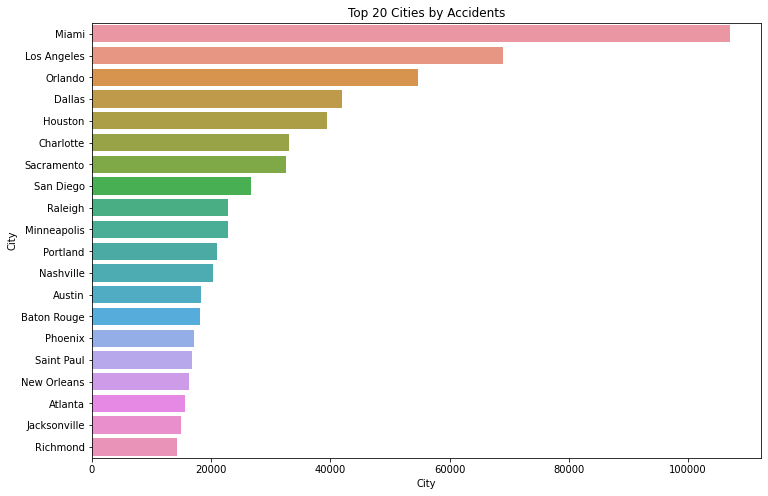

In [ ]:
plt.figure(figsize = (12,8))
plt.title('Top 20 Cities by Accidents')
plt.xlabel('Number of Accidents')   # I don't know why am i unable to customize the x-axis label here.
plt.ylabel('City')
sns.barplot(x = cities_by_accidents[0:20] , y = cities_by_accidents[0:20].index);

Let's look at what the distribution of number of accidents looks like.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


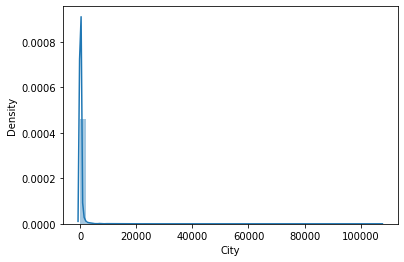

In [ ]:
sns.distplot(cities_by_accidents);

The distribution plot above shows that most of the cities in this dataset have less than 2000 accidents.

Let's divide the cities into three categories : 

very_high_accidents_cities, 

high_accidents_cities and 

low_accidents_cities and check what their distributions looks like.

In [ ]:
very_high_accidents_cities = cities_by_accidents[cities_by_accidents >= 10000]
high_accidents_cities = cities_by_accidents[(cities_by_accidents >= 1000) & (cities_by_accidents < 10000)]
low_accidents_cities = cities_by_accidents[cities_by_accidents < 1000]

In [ ]:
len(very_high_accidents_cities)

34

So, there are just 34 cities out of more than 11000 cities in USA which have had more than 10,000 accidents over the course of 5 years.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


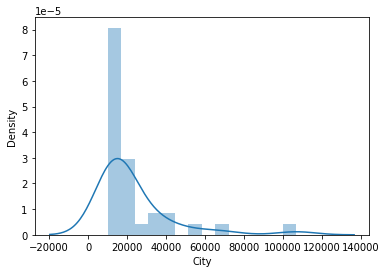

In [ ]:
sns.distplot(very_high_accidents_cities);

In [ ]:
len(high_accidents_cities)

462

In [ ]:
len(high_accidents_cities)*100/len(cities_by_accidents)

3.955140826983991

Thus, less than 4% of the cities in USA come under the category of high_accidents_cities and have equal to or more than 1000 accidents.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


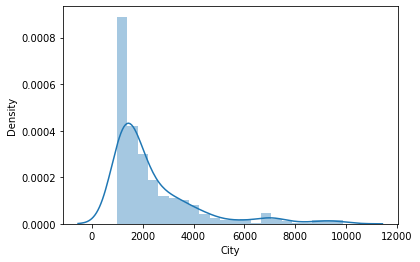

In [ ]:
sns.distplot(high_accidents_cities);

In [ ]:
len(low_accidents_cities)

11185

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


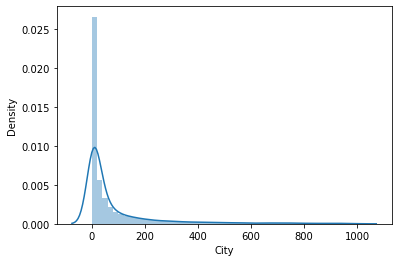

In [ ]:
sns.distplot(low_accidents_cities);

In all these distribution plots above, there is a common pattern. Less and less cities have high number of accidents. In fact, the number of accidents per city seems to decrease exponentially.

Let's plot a histogram with log scale .

In [ ]:
# Usually, we have what is called a Linear scale in plots. It means equal spacing between bins and the scale moves one unit at a time. 
# Such a scale might not be very helpful when we have data following exponential distribution. Log scale has unequal bins with the scale moving by multiple of 10 at a time.
# Log Scale is much more suitable for data following exponential distribution.

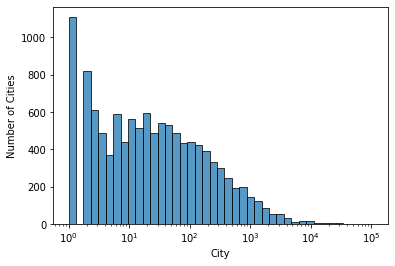

In [ ]:
plt.xlabel = ('Number of Accidents')
plt.ylabel('Number of Cities') # Again, I am unable to customize the x-axis label in this plot.
sns.histplot(cities_by_accidents, log_scale = True);

Looking at this graph, we can tell that around 1200 cities have reported nearly 0 cases of accidents over the course of past 5 years, which seems unbelievable. Let's dive deeper into this.

In [ ]:
len(cities_by_accidents[cities_by_accidents == 1 ])

1110

In [ ]:
len(cities_by_accidents[cities_by_accidents == 2 ])

819

Thus, we can say that around 2000 cities have reported just 1 or 2 cases according to this dataset. That's like 10% of the cities. Let's see who these cities are.

In [ ]:
zero_accidents_cities = cities_by_accidents[cities_by_accidents <= 2]
zero_accidents_cities

Sullivans Island                2
Brilliant                       2
Duson                           2
Binford                         2
Parrott                         2
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1929, dtype: int64

So, next we'll analyse the column `Start_Time`.

### Start Time

In [ ]:
new_df.Start_Time.isnull().sum()

0

Okay, so we do not have any null values in this column.

In [ ]:
new_df.Start_Time[0]

'2016-02-08 00:37:08'

The datatype of this column is `object`. Let's convert this into `datetime` to make it more useful.

In [ ]:
new_df.Start_Time = pd.to_datetime(new_df.Start_Time)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
pd.options.mode.chained_assignment = None # how to deal with settingwithcopy warning in pandas, copied this code from stackoverflow

In [ ]:
new_df.Start_Time = pd.to_datetime(new_df.Start_Time)

In [ ]:
new_df.Start_Time[0]

Timestamp('2016-02-08 00:37:08')

Okay, so we have successfully converted this column into Datetime datatype.

In [ ]:
new_df.Start_Time.dt.hour

0           0
1           5
2           6
3           6
4           7
           ..
2845337    18
2845338    19
2845339    19
2845340    19
2845341    18
Name: Start_Time, Length: 2845342, dtype: int64

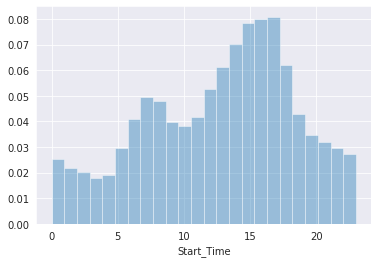

In [ ]:
sns.set_style('darkgrid')
sns.distplot(new_df.Start_Time.dt.hour, bins = 24 , kde = False , norm_hist = True);  # bins = 24 because there are 24 hours in a day
                                                                                      # norm_hist = True shows the percentages on the y-axis instead of count

We can see in the plot above, a high percentage of accidents occur between 3 PM and 7 PM, probably because people are coming back from work and traffic is high.

The next high percentage occurs between 8 AM and 9 AM, probably because people are in a hurry to get to work.

In [ ]:
new_df.Start_Time.dt.dayofweek   # It is assumed that the week starts on Monday which is denoted by 0 and ends on Sunday which is denoted by 6.

0          0
1          0
2          0
3          0
4          0
          ..
2845337    4
2845338    4
2845339    4
2845340    4
2845341    4
Name: Start_Time, Length: 2845342, dtype: int64

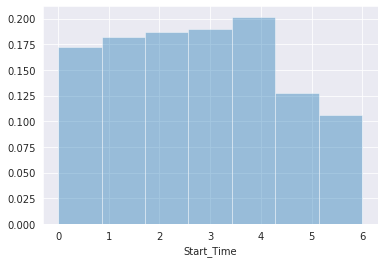

In [ ]:
sns.distplot(new_df.Start_Time.dt.dayofweek, bins = 7 , kde = False , norm_hist = True); # 7 bins for 7 days of the week

Weekdays seem to account for a higher percentage of accidents compared to weekends, which makes sense because people have to go to work during weekdays leading to more traffic. And people are usually at home during weekends resulting in less traffic on roads.

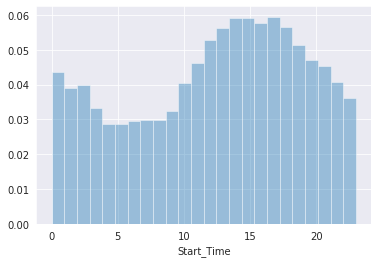

In [ ]:
sundays_start_time = new_df.Start_Time[new_df.Start_Time.dt.dayofweek == 6]
sns.distplot(sundays_start_time.dt.hour, bins = 24 , kde = False , norm_hist = True);  # bins = 24 because there are 24 hours in a day

On Sundays, the peak occurs between 12 PM and 9 PM.

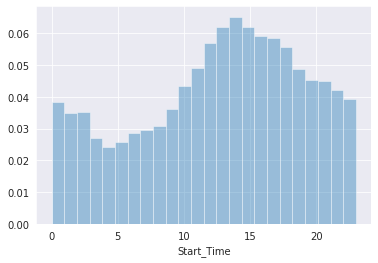

In [ ]:
saturdays_start_time = new_df.Start_Time[new_df.Start_Time.dt.dayofweek == 5]
sns.distplot(saturdays_start_time.dt.hour, bins = 24 , kde = False , norm_hist = True);  # bins = 24 because there are 24 hours in a day

On Saturdays, the peak occurs between 1 PM and 7 PM.

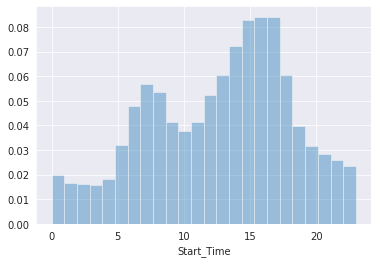

In [ ]:
mondays_start_time = new_df.Start_Time[new_df.Start_Time.dt.dayofweek == 0]
sns.distplot(mondays_start_time.dt.hour, bins = 24 , kde = False , norm_hist = True);  # bins = 24 because there are 24 hours in a day

On Mondays, the peak occurs during 3 PM and 6 PM.


The trend of accidents by hour follows the same pattern on Mondays as on all days of the week combined. However, on weekends, the distribution is more spread out.

In [ ]:
# The systems that we humans have created mess with the general statistics.
# The trend follows Normal/Gaussian Curve on Weekends , but on Weekdays, it's a 2 peak normal curve which arises due to office arrival and departure timings set by humans.

Let's look at month_wise distribution of accidents over the 6 years.

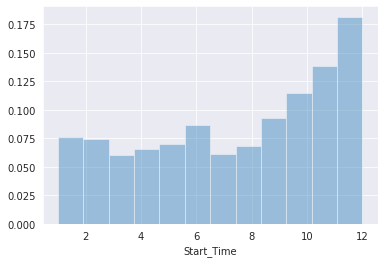

In [ ]:
sns.distplot(new_df.Start_Time.dt.month , bins = 12, kde = False , norm_hist = True); # 12 bins for 12 months in a year

This dataset does not contain data for January 2016. So, the bar should actually be a bit higher for January. The plot above shows that number of accidents is pretty lower during summers and it starts to pick up from October and reaches its maximum around December. This seems to be the general trend.

Let's not take this at face value. We'll look at the monthly trend for each year to find out if such a general trend exists.

For 2021

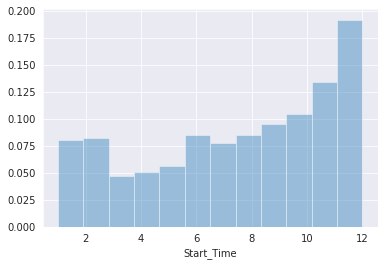

In [ ]:
sns.distplot(new_df.Start_Time.dt.month[new_df.Start_Time.dt.year == 2021] , bins = 12 , kde = False , norm_hist = True);

Okay, so here the trend for 2021 is the same as the overall trend.

For 2020

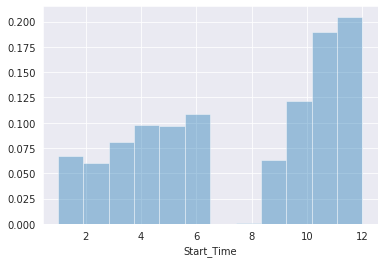

In [ ]:
sns.distplot(new_df.Start_Time.dt.month[new_df.Start_Time.dt.year == 2020] , bins = 12 , kde = False , norm_hist = True);

Okay, so we do not have data for July and August of the year 2020, probably because of the Covid Lockdown. For the year 2020, we see a similar trend as above with the winter months accounting for the maximum number of accidents.

For 2019

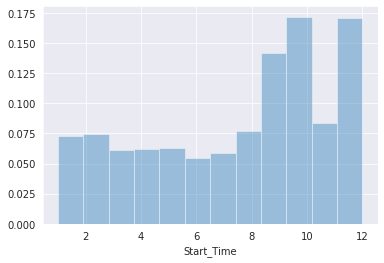

In [ ]:
sns.distplot(new_df.Start_Time.dt.month[new_df.Start_Time.dt.year == 2019] , bins = 12 , kde = False , norm_hist = True);

So in the year 2019 also, December has the maximum number of accidents and summer months are pretty low on this. However, September and October have unusually high number of accidents during this year.

For 2018

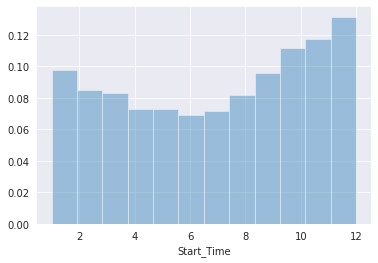

In [ ]:
sns.distplot(new_df.Start_Time.dt.month[new_df.Start_Time.dt.year == 2018] , bins = 12 , kde = False , norm_hist = True);

The distribution seems much more balanced over the 12 months here.
Here again, a similar trend. However, January and February have unusually high number of accidents in this year. 

For 2017

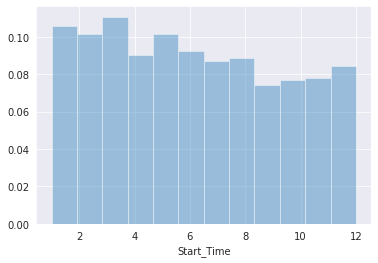

In [ ]:
sns.distplot(new_df.Start_Time.dt.month[new_df.Start_Time.dt.year == 2017] , bins = 12 , kde = False , norm_hist = True);

Here also, we have a balanced distribution. However, we get to see a contrasting scenario with the summer months accounting for the majority of accidents and the number going down around December. January also has unusually high percentage of accidents here.

For 2016

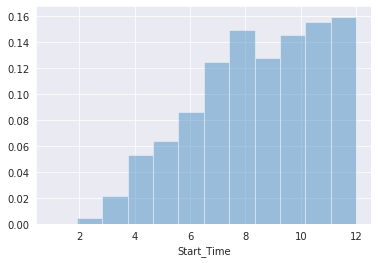

In [ ]:
sns.distplot(new_df.Start_Time.dt.month[new_df.Start_Time.dt.year == 2016] , bins = 12 , kde = False , norm_hist = True);

So, here the trend is different from 2017 for the starting months of the year. Maybe because the system was just setup during this time and we do not have all the data for these months. But, again the distribution seems balanced here as well.

`Month-Wise Analysis on an year-on-year basis`: The distribution is quite balanced over the months for the years 2016,2017 and 2018. However, for the years 2019, 2020 and 2021 , the summer months account for lower number of accidents. The pace picks up from September-October and peaks around December.

Let's look at the overall trend of accidents over the course of 6 years , from 2016 to 2021.

In [ ]:
number_of_accidents_per_year = new_df.Start_Time.dt.year.value_counts()
number_of_accidents_per_year

2021    1511745
2020     625864
2019     258615
2017     163918
2018     163176
2016     122024
Name: Start_Time, dtype: int64

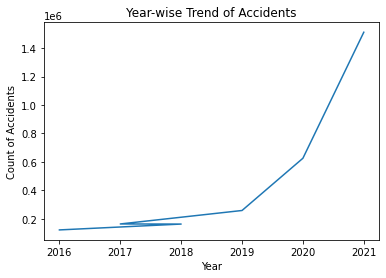

In [ ]:
plt.title('Year-wise Trend of Accidents')
plt.xlabel('Year')
plt.ylabel('Count of Accidents')
plt.plot(number_of_accidents_per_year);

Unfortunately, the number of car accidents has increased over the years in USA. The count for the years 2016, 2017 and 2018 is pretty low compared to recent years partly because the system was still in the process of being set up, as we had noticed during month-wise analysis. But, overall we can see the numbers increasing only.

Next, we'll analyse the columns `Start_Lat` and `Start_Lng` together.

### Start Latitude and Start Longitude

In [ ]:
new_df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [ ]:
new_df.Start_Lng

0          -83.092860
1          -84.062800
2          -84.524680
3          -81.537840
4          -84.492792
              ...    
2845337   -117.379360
2845338   -117.148060
2845339   -117.847790
2845340   -118.403020
2845341   -117.230920
Name: Start_Lng, Length: 2845342, dtype: float64

Let's look at a scatter plot showing the points of latitude and longitude.

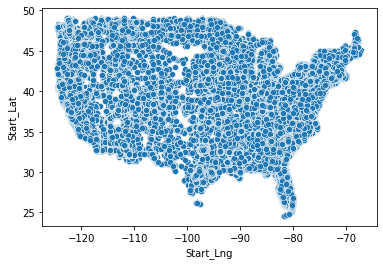

In [ ]:
sns.scatterplot(x=new_df.Start_Lng,y=new_df.Start_Lat); #Why did we take Latitude on y-axis and Longitude on x-axis?

Let's reduce the size of points here.

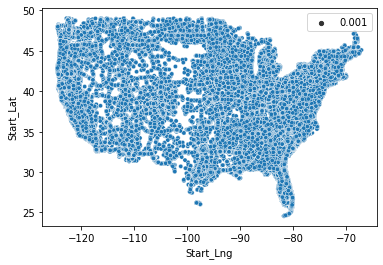

In [ ]:
sns.scatterplot(x=new_df.Start_Lng,y=new_df.Start_Lat,size = .001);

Let's try to put these points on a map.

In [ ]:
import folium;

In [ ]:
folium.Map()

In [ ]:
lat, lng = new_df.Start_Lat[0], new_df.Start_Lng[0]
lat,lng

(40.10891, -83.09286)

In [ ]:
map=folium.Map()
marker=folium.Marker((lat,lng))
marker.add_to(map)
map

Okay,so now we have plotted one accident on the map.

Now, we need to make a list of pairs of Longitude and Latitude values to work ahead with the folium library.

In [ ]:
list(zip(list(new_df.Start_Lat),list(new_df.Start_Lng)))

[(40.10891, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (41.06213, -81.53784),
 (39.172393, -84.49279200000002),
 (39.06324, -84.03243),
 (39.77565, -84.18603),
 (41.37531, -81.82016999999998),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.97241, -82.84695),
 (39.9838, -82.85656999999998),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243000000002),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.30732, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659000000002),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623000000002),
 (41.95677, -83.67214),
 (38.27401, -85.74844),
 (41.95677, -83.67214),
 (40.52225, -80.06666),
 (40.487814, -80.009439),
 (40

In [ ]:
sample_df = new_df.sample(int(0.001*len(new_df)))
lat_lng_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

Let's plot a heat map where higher the number of accidents, darker the red colour.

In [ ]:
from folium.plugins import HeatMap
map = folium.Map()
HeatMap(lat_lng_pairs).add_to(map) # Here we are adding HeatMap data to the world map we created
map

As we can see in the heatmap above, most of the accidents happened on or near the coastal areas.

### Severity

In [ ]:
new_df.Severity

0          3
1          2
2          2
3          2
4          3
          ..
2845337    2
2845338    2
2845339    2
2845340    2
2845341    2
Name: Severity, Length: 2845342, dtype: int64

In [ ]:
new_df.Severity.unique()

array([3, 2, 4, 1])

So, it looks like the column `Severity` contains four values 1 to 4 , where 1 indicates the least impact on traffic (i.e., short delay as a result of the accident) and 4 indicates a significant impact on traffic (i.e., long delay).

In [ ]:
Severity_count =  new_df.Severity.value_counts()

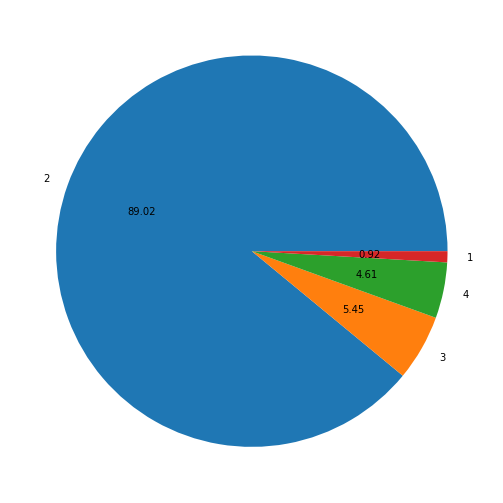

In [ ]:
plt.figure(figsize = (9,9))
plt.pie(Severity_count, labels = Severity_count.index, autopct = '%.2f',  );

Thus, 89 % of the accidents had severity of 2 which means moderate impact on traffic. And 4.61 % of the accidents had a huge impact on the traffic.

In [ ]:
new_df.describe().applymap(lambda x: f"{x:0.3f}")  # This command gives the output upto 3 significant digits.

,Severity,Start_Lat,Start_Lng,Temperature(F)
count,2845342.000,2845342.000,2845342.000,2776068.000
mean,2.138,36.245,-97.115,61.794
std,0.479,5.364,18.318,18.623
min,1.000,24.566,-124.548,-89.000
25%,2.000,33.445,-118.033,50.000
50%,2.000,36.099,-92.418,64.000
75%,2.000,40.160,-80.372,76.000
max,4.000,49.001,-67.113,196.000


As we can see in the table above, on an average, the severity of an accident is 2.138.

There are dozens of more columns that can be analysed in this dataset. I have analysed some of the columns that piqued my interest . 

In the next section, I have summarised all my findings during EDA of the dataset.

## Summary and Conclusion

1. The dataset covers 49 states and more than 11000 cities of USA. `Miami` is the city with the maximum number of accidents. New York and Chicago are the two most populated cities, but still they do not appear in the list of top 20 Cities with maximum number of accidents.

2. `34` cities have witnessed more than 10,000 accidents over the 6 years. `4%` of the Cities have accidents between 1000 and 10,000. Around `2000` cities have reported 1 or 2 accidents over past 5 years, which is quite unbelievable.
Less and less cities have high number of accidents. In fact, the number of accidents per city seems to decrease exponentially.

3. Morning(`8 AM to 9 AM`) and Evening(`3 PM to 7 PM`) rush hours witness the highest number of accidents in a day. Weekdays account for higher number of accidents compared to Weekends in a week. The trend of accidents by hour follows the same pattern on Mondays as on all days of the week combined. However, on weekends, the distribution is more spread out.

4. The distribution of accidents is quite balanced over the months for the years 2016, 2017 and 2018. However, for the years 2019, 2020 and 2021 , the summer months account for lower number of accidents comparatively. The pace picks up from September-October and peaks around December.

      Over the 6 years, we see an `increasing` trend in the number of accidents.

5. Most of the accidents have occurred on or near the `coastal areas`.  
`89%` of the accidents had severity of `2` which means moderate impact on traffic. And `4.61% `of the accidents had a huge impact on the traffic eith a severity of `4`. On an average, the severity of an accident was `2.138`.

In [ ]:
# Execute this command to save new versions of the notebook
jovian.commit(project="us-accidents-eda-project")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/palak780nain/us-accidents-eda-project


'https://jovian.ai/palak780nain/us-accidents-eda-project'

Lessons: 
1. Whenever you notice something unusual, take note of it and explore it later on. 
2. Always use external data to validate your findings during analysis.
3. When you select a column, you really wanna understand that column.
4. Use the same data that you have at different levels of granularity to check the validity of your hypothesis e.g. Do winter months face higher number of accidents? Check this for all the 5 years and then year-on-year basis to find if the pattern stays the same everywhere.
5. Whenever you are putting dots on a map or doing some aggregations, it always helps to pick a sample because the sample will always have more or less the same characteristics as the overall dataset.
6. Data Analysis is not so much about knowing these tools by heart. It's about being able to find the right function to do what you want. You should know how to figure out.
7. `About Domain Knowledge`: So you will have to do some special learning about the domain, but generally that is more of a surface-level learning. Initially it will suffice where you will be told in the orientation about what the company does and what the data looks like. But, you may want to overtime get deeper and deeper. You uncover the information about the domain you are getting into slowly and it happens very organically. So, don't be close to it. Be open to it. You don't need to spend a year learning about the domain to get into that field. You'll get into the field and keep digging in and keep learning the things that you need to learn. 